# Customer Churn Prediction 

this project would use the ML model to predict customer Churn , a data set will be imported with all Features and the target is to use dataset to train the ML module to define and predict customer churn , also visualise data to see relation between features . as dataset has dependant variable (predictor) and independant variables (target) , we will apply supervised Machine learning method .

In [2]:
#import librararies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# import dataset

In [3]:
dataset=pd.read_csv('Churn Modeling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data preprocessing 

in data preprocessing , we will check the dataset , understand the features , see the description of dataset , check the null values .

In [4]:
# dataset description 
dataset.shape

(10000, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


 as in above , we have a dataset of 10K rows and 14 columns , there is no null value , not all features classified as continuos (numerical) there is two columns with categorical class . this should be tranformed to numerical values 

In [7]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
dataset.groupby('Gender').size()

Gender
Female    4543
Male      5457
dtype: int64

In [10]:
dataset.groupby('Exited').size()

Exited
0    7963
1    2037
dtype: int64

In [14]:
dataset.groupby(['Exited','Gender']).size()

Exited  Gender
0       Female    3404
        Male      4559
1       Female    1139
        Male       898
dtype: int64

In [32]:
dataset.groupby(['Exited','Geography']).size()

Exited  Geography
0       France       4204
        Germany      1695
        Spain        2064
1       France        810
        Germany       814
        Spain         413
dtype: int64

In [36]:
dataset.groupby(['Geography','Exited']).size()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
dtype: int64

In [15]:
# confirm the null values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
dataset.isin(['?']).sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Data Visualization 

<AxesSubplot:xlabel='Exited', ylabel='count'>

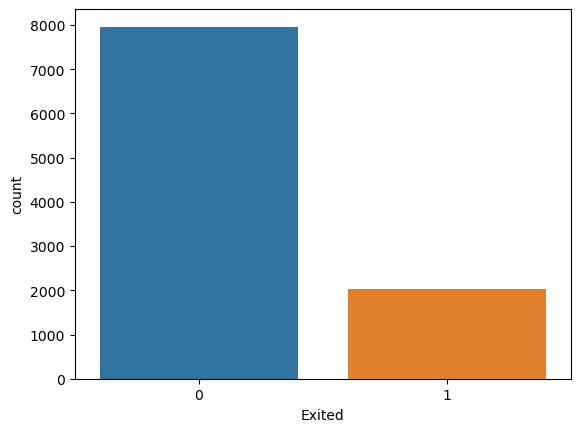

In [20]:
sns.countplot(x=dataset['Exited'],data=dataset)

<AxesSubplot:xlabel='Gender', ylabel='count'>

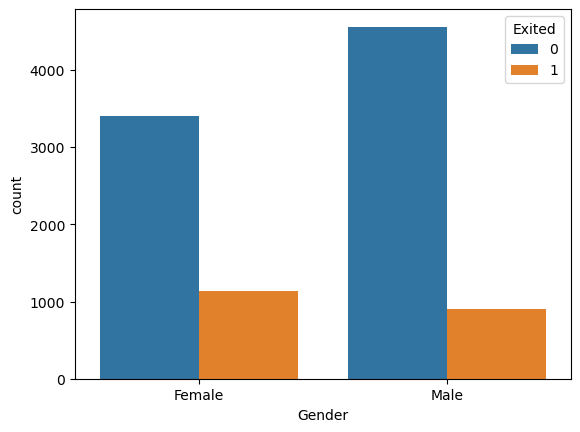

In [21]:
sns.countplot(x=dataset['Gender'],data=dataset,hue='Exited')

<AxesSubplot:xlabel='Geography', ylabel='count'>

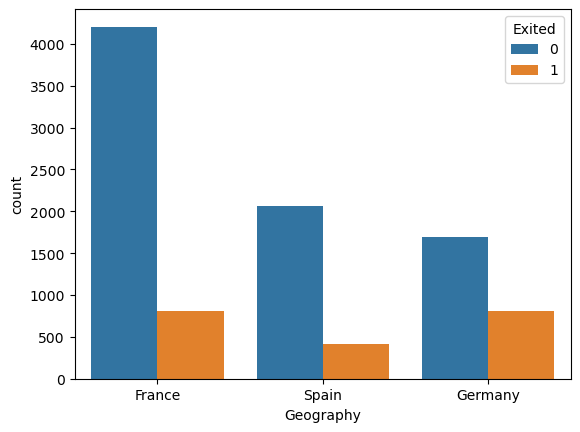

In [28]:

sns.countplot(x=dataset['Geography'],data=dataset,hue=dataset['Exited']=1)

<AxesSubplot:>

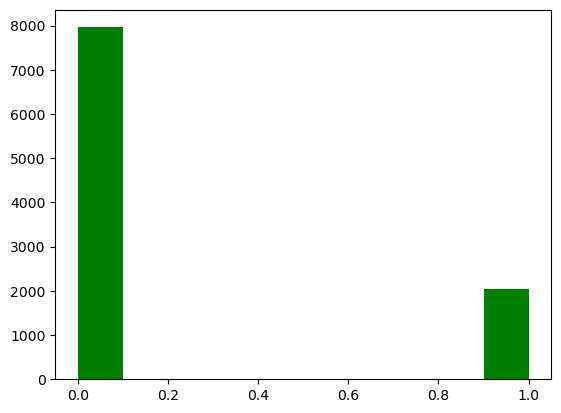

In [27]:
dataset['Exited'].hist(color='green',grid=False)

<AxesSubplot:>

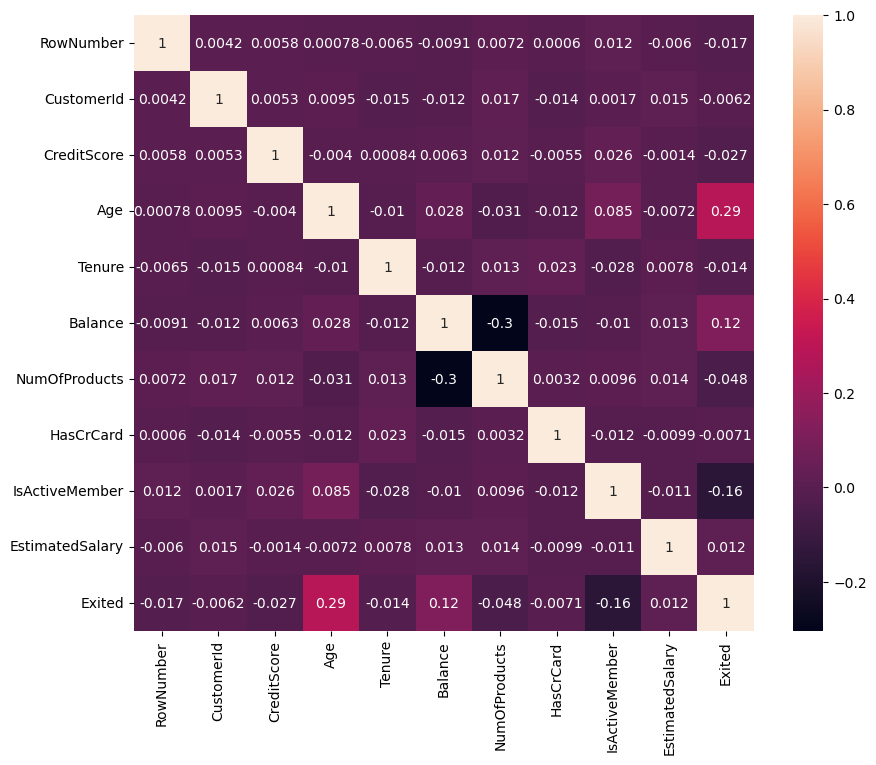

In [40]:
#to understand the relation between all features , there is a amtrix called (heatmap) which provide the impact of any feature to other .
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True)

the value could be 0 , >1 or <1 , if the value close to 1 , that is mean there is a positive corelation between features if it is close to -1 , it means there is negative corelation between values , if its near to zero , there is no corelation .

#  Notes in dataset :
1- there is no null values , so no need to drop any rows/columns or replace this null values .
2- there is a categorical columns that need to be tranformed .
3- as target value (Exited) has only two values (0,1) or (Yes or no) . we will use a classifiction supervised Machine learning models and select the best module .

In [44]:
# selecting the trainng and test dependant and in-dependnat features , here i found that dependant variable will be column 13 while columns[3:13] will be the in-dependant variables 
X=dataset.iloc[:,3:13].values
y=dataset.iloc[:,13].values

In [45]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [46]:
print(y)

[1 0 1 ... 1 1 0]


In [47]:
X.shape

(10000, 10)

In [48]:
y.shape

(10000,)

# Data Transformarion 
# there are two categorical features that need to be transformed (Geograpghy , Gendre) before splitting and apply ML model .
# i will use label encoder to tranform the data in these two columns .

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
X[:,1]=labelencoder_X.fit_transform(X[:,1])
X[:,2]=labelencoder_X.fit_transform(X[:,2])

In [50]:
print(X)

[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]


# as in above , label encoder transformed Geagraphy to number (France:0 ,Spain:2 , Germany:1) and Gendre(Female:0 and male:1).

In [51]:
#splitting data set into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

the dataset splitted to 80% of training data and 20% of testing data , with random state=0 .

In [52]:
print(X_train)

[[667 2 0 ... 1 0 163830.64]
 [427 1 1 ... 1 1 57098.0]
 [535 0 0 ... 1 0 185630.76]
 ...
 [738 0 1 ... 1 0 181429.87]
 [590 2 0 ... 1 1 148750.16]
 [623 1 0 ... 1 0 118855.26]]


In [53]:
X_train.shape

(8000, 10)

In [54]:
X_test.shape

(2000, 10)

In [58]:
print(X_test)

[[597 1 0 ... 1 1 192852.67]
 [523 0 0 ... 1 0 128702.1]
 [706 2 0 ... 1 1 75732.25]
 ...
 [578 2 1 ... 1 0 141533.19]
 [650 1 1 ... 1 1 11276.48]
 [573 1 1 ... 1 0 192950.6]]


In [56]:
y_train.shape

(8000,)

In [57]:
y_test.shape

(2000,)

# from X values , we can see that there is big diffrence between values in Feature (Gendre,Balance) one with value of 0 or 1 , and other with high values .
# to have accurate data modelling , i will make standard scaler to have the same range of values .


In [61]:
# Feature Scaling
# Standard Scaling:  Standardization = X'=X-mean(X)/standard deviation
# normal scaling : Normalization= X'=X-min(X)/max(x)-min(X)

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train_sc=sc_X.fit_transform(X_train)
X_test_sc=sc_X.transform(X_test)

In [62]:
print(X_train_sc)

[[ 0.16958176  1.51919821 -1.09168714 ...  0.64259497 -1.03227043
   1.10643166]
 [-2.30455945  0.3131264   0.91601335 ...  0.64259497  0.9687384
  -0.74866447]
 [-1.19119591 -0.89294542 -1.09168714 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.9015152  -0.89294542  0.91601335 ...  0.64259497 -1.03227043
   1.41231994]
 [-0.62420521  1.51919821 -1.09168714 ...  0.64259497  0.9687384
   0.84432121]
 [-0.28401079  0.3131264  -1.09168714 ...  0.64259497 -1.03227043
   0.32472465]]


In [64]:
print(X_test_sc)

[[-0.55204276  0.3131264  -1.09168714 ...  0.64259497  0.9687384
   1.61085707]
 [-1.31490297 -0.89294542 -1.09168714 ...  0.64259497 -1.03227043
   0.49587037]
 [ 0.57162971  1.51919821 -1.09168714 ...  0.64259497  0.9687384
  -0.42478674]
 ...
 [-0.74791227  1.51919821  0.91601335 ...  0.64259497 -1.03227043
   0.71888467]
 [-0.00566991  0.3131264   0.91601335 ...  0.64259497  0.9687384
  -1.54507805]
 [-0.79945688  0.3131264   0.91601335 ...  0.64259497 -1.03227043
   1.61255917]]


# now data is ready for Machine learning , we will apply diffrent scenarios for supervised classifictaion ML .

#  Decision tree 

In [65]:
#decision tree algorith with criteria of entropy .
from sklearn.tree import DecisionTreeClassifier
classifier_decision=DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier_decision.fit(X_train_sc,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [66]:
#predicting Decision tree class
y_pred_DT=classifier_decision.predict(X_test_sc)

In [68]:
print(y_pred_DT)

[1 1 0 ... 0 0 0]


In [70]:
#getting the confusion matrix
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_pred_DT)
print('confusion matrix')
print(cm_dt)

confusion matrix
[[1362  233]
 [ 200  205]]


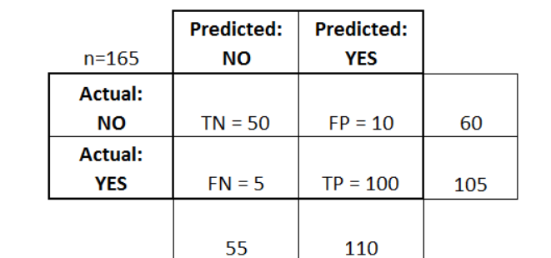

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('Accuracy_dt : %.2f'%(accuracy_score(y_test,y_pred_DT)*100))

Accuracy_dt : 78.35


In [73]:
Accuracy_dt=accuracy_score(y_test,y_pred_DT)*100

In [74]:
Accuracy_dt

78.35

In [96]:
# calculate score
score_dt = f1_score(y_test, y_pred_DT, average='binary')
print('F-Measure: %.3f' % (score_dt*100))

F-Measure: 48.636


In [123]:
Fscore_dt=f1_score(y_test, y_pred_DT, average='binary')*100
Fscore_dt=np.round(Fscore_dt,2)
Fscore_dt

48.64

# KNN machine learning 

In [75]:
#using KNN ML , with number of neighbors of 5 and using minkowski method for distance between data points
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier_knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [76]:
y_pred_knn=classifier_knn.predict(X_test_sc)

In [77]:
#getting the confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,y_pred_knn)
print('confusion matrix')
print(cm_knn)

confusion matrix
[[1496   99]
 [ 232  173]]


In [78]:
from sklearn.metrics import accuracy_score
print('Accuracy_knn : %.2f'%(accuracy_score(y_test,y_pred_knn)*100))

Accuracy_knn : 83.45


In [79]:
Accuracy_knn=accuracy_score(y_test,y_pred_knn)*100

In [80]:
Accuracy_knn

83.45

In [97]:
# calculate score
score_knn = f1_score(y_test, y_pred_knn, average='binary')
print('F-Measure: %.3f' % (score_knn*100))

F-Measure: 51.108


In [122]:
Fscore_knn=f1_score(y_test, y_pred_knn, average='binary')*100
Fscore_knn=np.round(Fscore_knn,2)
Fscore_knn

51.11

# SVM(support vectore machine).

In [81]:
from sklearn.svm import SVC
classifier_svm=SVC(kernel='rbf',random_state=0,probability=True)
classifier_svm.fit(X_train_sc,y_train)

SVC(probability=True, random_state=0)

In [82]:
y_pred_svm=classifier_svm.predict(X_test_scaled)

In [83]:
#getting the confusion matrix
from sklearn.metrics import confusion_matrix
cm_SVM=confusion_matrix(y_test,y_pred_svm)
print('confusion matrix')
print(cm_SVM)

confusion matrix
[[1560   35]
 [ 239  166]]


In [84]:
from sklearn.metrics import accuracy_score
print('Accuracy_svm : %.2f'%(accuracy_score(y_test,y_pred_svm)*100))

Accuracy_svm : 86.30


In [85]:
Accuracy_svm=accuracy_score(y_test,y_pred_svm)*100

In [86]:
Accuracy_svm

86.3

In [98]:
# calculate score
score_svm = f1_score(y_test, y_pred_svm, average='binary')
print('F-Measure: %.3f' % (score_dt*100))

F-Measure: 48.636


In [120]:
Fscore_svm=f1_score(y_test, y_pred_svm, average='binary')*100
Fscore_svm=np.round(Fscore_svm,2)
Fscore_svm

54.79

# Random Forest

In [87]:
#Training the data to random forest
from sklearn.ensemble import RandomForestClassifier
classifier_Random=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=0)
classifier_Random.fit(X_train_sc,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [88]:
y_pred_Random=classifier_Random.predict(X_test_sc)

In [89]:
#getting the confusion matrix
from sklearn.metrics import confusion_matrix
cm_Rand=confusion_matrix(y_test,y_pred_Random)
print('confusion matrix')
print(cm_Rand)

confusion matrix
[[1523   72]
 [ 203  202]]


In [90]:
from sklearn.metrics import accuracy_score
print('Accuracy_Rand : %.2f'%(accuracy_score(y_test,y_pred_Random)*100))

Accuracy_Rand : 86.25


In [91]:
Accuracy_Rand=accuracy_score(y_test,y_pred_Random)*100

In [92]:
Accuracy_Rand

86.25

In [119]:
# calculate score
score_Random = f1_score(y_test, y_pred_Random, average='binary')
print('F-Measure: %.3f' % (score_Random*100))

F-Measure: 59.499


In [118]:
Fscore_Random=f1_score(y_test, y_pred_Random, average='binary')*100
Fscore_Random=np.round(Fscore_Random,2)
Fscore_Random

59.5

Classification Accuracy: It is one of the important parameters to determine the accuracy of the classification problems. It defines how often the model predicts the correct output. It can be calculated as the ratio of the number of correct predictions made by the classifier to all number of predictions made by the classifiers. The formula is given below

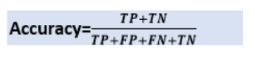

Precision: It can be defined as the number of correct outputs provided by the model or out of all positive classes that have predicted correctly by the model, how many of them were actually true. It can be calculated using the below formula
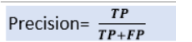
    

F-measure: If two models have low precision and high recall or vice versa, it is difficult to compare these models. So, for this purpose, we can use F-score. This score helps us to evaluate the recall and precision at the same time. The F-score is maximum if the recall is equal to the precision. It can be calculated using the below formula:
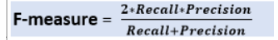

Recall: It is defined as the out of total positive classes, how our model predicted correctly. The recall must be as high as possible.
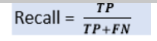

# NAIVE_BAYES

In [100]:
from sklearn.naive_bayes import GaussianNB
classifier_NB=GaussianNB()
classifier_NB.fit(X_train_sc,y_train)

GaussianNB()

In [101]:
y_pred_NB=classifier_NB.predict(X_test_sc)

In [102]:
#getting the confusion matrix
from sklearn.metrics import confusion_matrix
cm_NB=confusion_matrix(y_test,y_pred_NB)
print('confusion matrix')
print(cm_NB)

confusion matrix
[[1548   47]
 [ 298  107]]


In [103]:
from sklearn.metrics import accuracy_score
print('Accuracy_NB : %.2f'%(accuracy_score(y_test,y_pred_NB)*100))

Accuracy_NB : 82.75


In [104]:
Accuracy_NB=accuracy_score(y_test,y_pred_NB)*100

In [105]:
Accuracy_NB

82.75

In [108]:
# calculate score
score_Random = f1_score(y_test, y_pred_Random, average='binary')
print('F-Measure: %.3f' % (score_Random*100))

F-Measure: 59.499


In [121]:
Fscore_NB=f1_score(y_test, y_pred_NB, average='binary')*100
Fscore_NB=np.round(Fscore_NB,2)
Fscore_NB

38.28

In [106]:
accuracy_all={'model':['Decision tree','KNN','SVM','Random Forest','Naive_BAYES'],'Accuracy':[Accuracy_dt,Accuracy_knn,Accuracy_svm,Accuracy_Rand,Accuracy_NB]}

In [107]:
accuracy_all=pd.DataFrame(accuracy_all)
accuracy_all

,model,Accuracy
0,Decision tree,78.35
1,KNN,83.45
2,SVM,86.30
3,Random Forest,86.25
4,Naive_BAYES,82.75


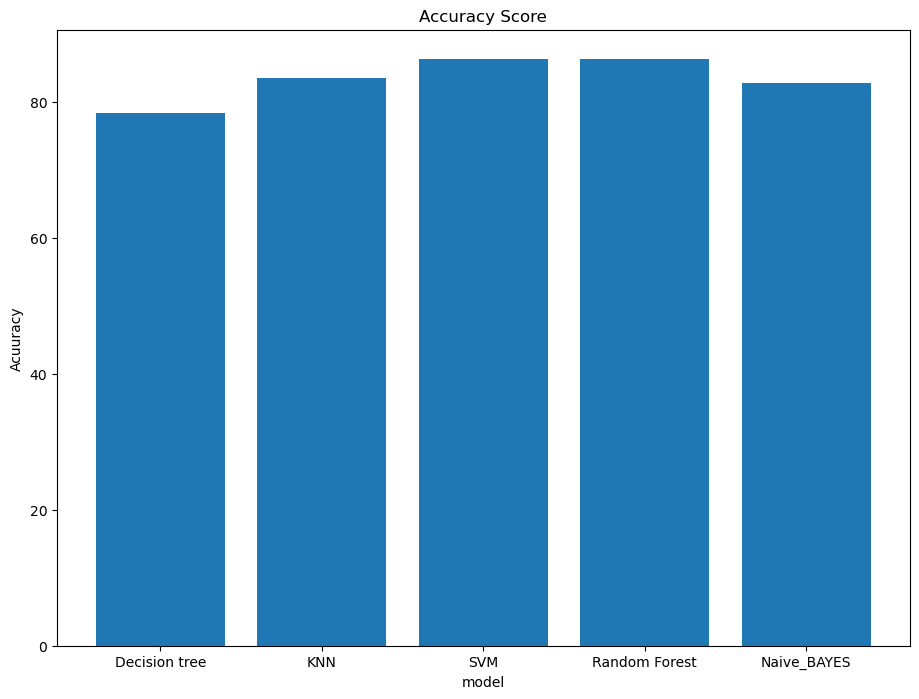

In [132]:
plt.figure(figsize=(11,8))
plt.bar(accuracy_all.iloc[:,0],accuracy_all.iloc[:,1])
plt.xlabel('model')
plt.ylabel('Acuuracy')
plt.title('Accuracy Score')
plt.show()


# from the above results with Accuracy score , we see that SVM has highest Accuracy from the modules .

In [124]:
Fscore_all={'model':['Decision tree','KNN','SVM','Random Forest','Naive_BAYES'],'Fscore':[Fscore_dt,Fscore_knn,Fscore_svm,Fscore_Random,Fscore_NB]}

In [126]:
Fscore_all=pd.DataFrame(Fscore_all)
Fscore_all

,model,Fscore
0,Decision tree,48.64
1,KNN,51.11
2,SVM,54.79
3,Random Forest,59.50
4,Naive_BAYES,38.28


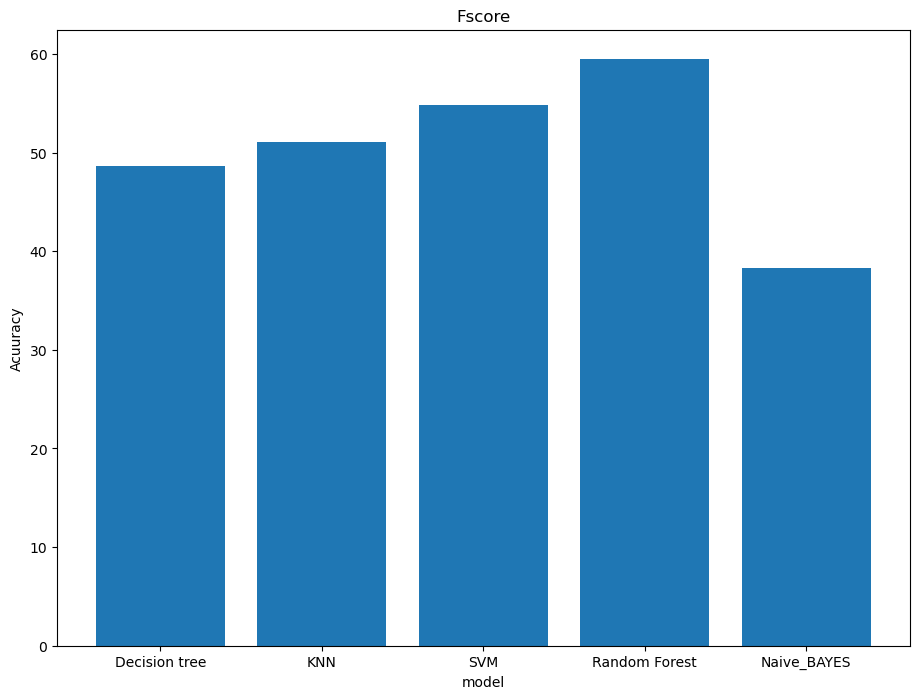

In [131]:
plt.figure(figsize=(11,8))
plt.bar(Fscore_all.iloc[:,0],Fscore_all.iloc[:,1])
plt.xlabel('model')
plt.ylabel('Acuuracy')
plt.title('Fscore')
plt.show()

# from Performance paramters , we see that SVM and Random Forest was the best modules , however in Random Forest was better in Fscore , so we will apply a sample on using Random Forest ML model .

In [143]:
# apply sample Pred on new input using Random Foreest algorith 
CreditScore=500
Age=35
Geography=1
Gender=0
Tenure=6
Balance=50000
NumOfproducts=3
HasCrCard=1
IsActiveMember=1
EstimatedSalary=100000




Pred=classifier_Random.predict(sc_X.transform([[CreditScore,Age,Geography,Gender,Tenure,Balance,NumOfproducts,HasCrCard,IsActiveMember,EstimatedSalary]]))


if Pred==1:
    print('the customer will exit ')
    
else:
    print('the customer will stay ')

the customer will exit 
